<a href="https://colab.research.google.com/github/simraaannn09/CODSOFT/blob/main/Sms_Spam_Detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **SIMRAN AGARWAL**
### **MACHINE LEARNING PROJECT-CODSOFT**
### **SMS SPAM DETECTION**



In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
#convert text into feature vector or numeric values
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#loading the data from the csv file to the pandas dataframe
data=pd.read_csv("/content/spam.csv", encoding="Latin")

In [ ]:
print(data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [3]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

mail_data=data.where((pd.notnull(data)),'')

In [4]:
#replace the null values with a null string
# creating a new dataframe
mail_data=data.where((pd.notnull(data)),'')

In [5]:
#printing the first 5 rows of the dataframe
mail_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [6]:
mail_data.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'],inplace= True)

In [7]:
mail_data.sample(4)

,v1,v2
259,ham,IÛ÷m parked next to a MINI!!!! When are you c...
3465,ham,"Actually fuck that, just do whatever, do find ..."
1478,ham,I think its far more than that but find out. C...
4594,ham,Yo sorry was in the shower sup


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

In [10]:
#rename the columns
mail_data=mail_data.rename(columns={'v1':'Category',
                                    'v2':'Message'})

In [11]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
mail_data['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

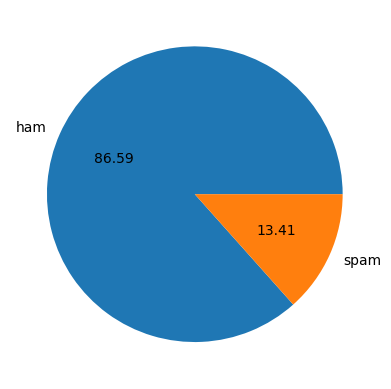

In [13]:
plot.pie(mail_data['Category'].value_counts(), labels=['ham', 'spam'],autopct='%0.2f')
plot.show()

In [14]:
pip install nltk

In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
#calculate the length of the message
mail_data['Message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Message, Length: 5572, dtype: int64

In [18]:
mail_data['num_characters']=mail_data['Message'].apply(len)

In [19]:
mail_data.head(5)

,Category,Message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
#fetch the number of words
mail_data['Message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5572, dtype: object

In [21]:
mail_data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Message, Length: 5572, dtype: int64

In [22]:
mail_data['num_words']=mail_data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
mail_data.head(5)

,Category,Message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
#calculate number of sentences in each sms/text/message
mail_data['Message'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Message, Length: 5572, dtype: object

In [25]:
mail_data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Message, Length: 5572, dtype: int64

In [26]:
mail_data['num_sentences']=mail_data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
mail_data.head(5)

,Category,Message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
mail_data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#label spam mail as 0 and ham mail as 1
mail_data.loc[mail_data['Category']=='spam','Category',]=0
mail_data.loc[mail_data['Category']=='ham','Category',]=1

In [30]:
#spam
mail_data[mail_data['Category']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
#ham
mail_data[mail_data['Category']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

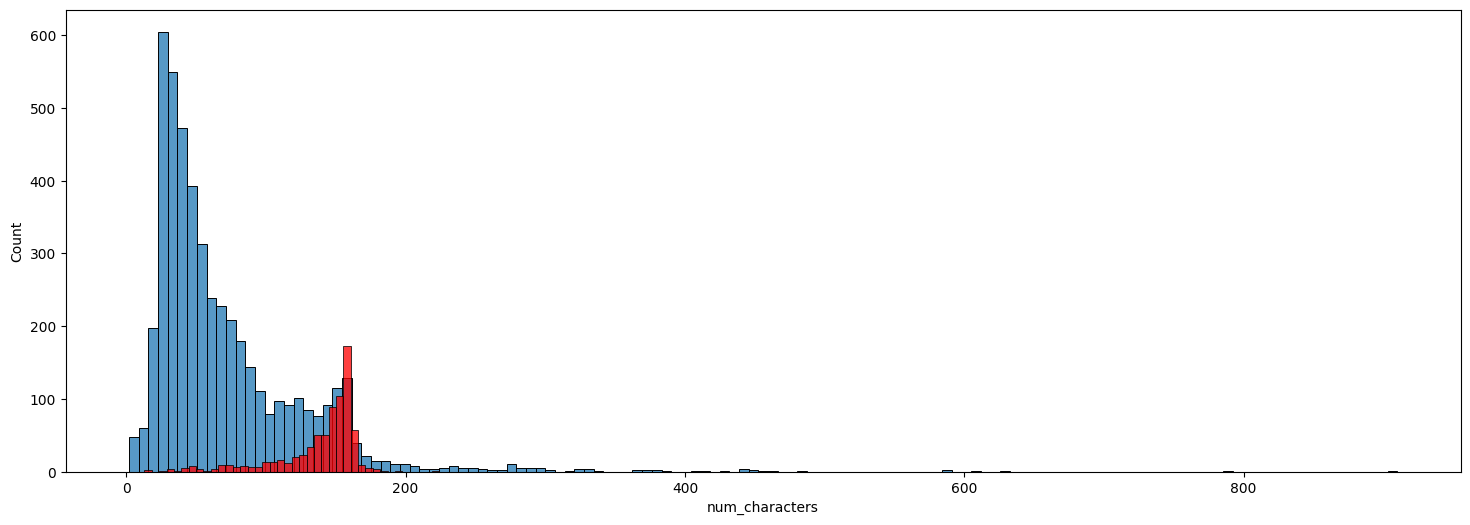

In [32]:
#plot histogram of ham and spam sms/email
plot.figure(figsize=(18,6))
sns.histplot(mail_data[mail_data['Category']==1]['num_characters'])
sns.histplot(mail_data[mail_data['Category']==0]['num_characters'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

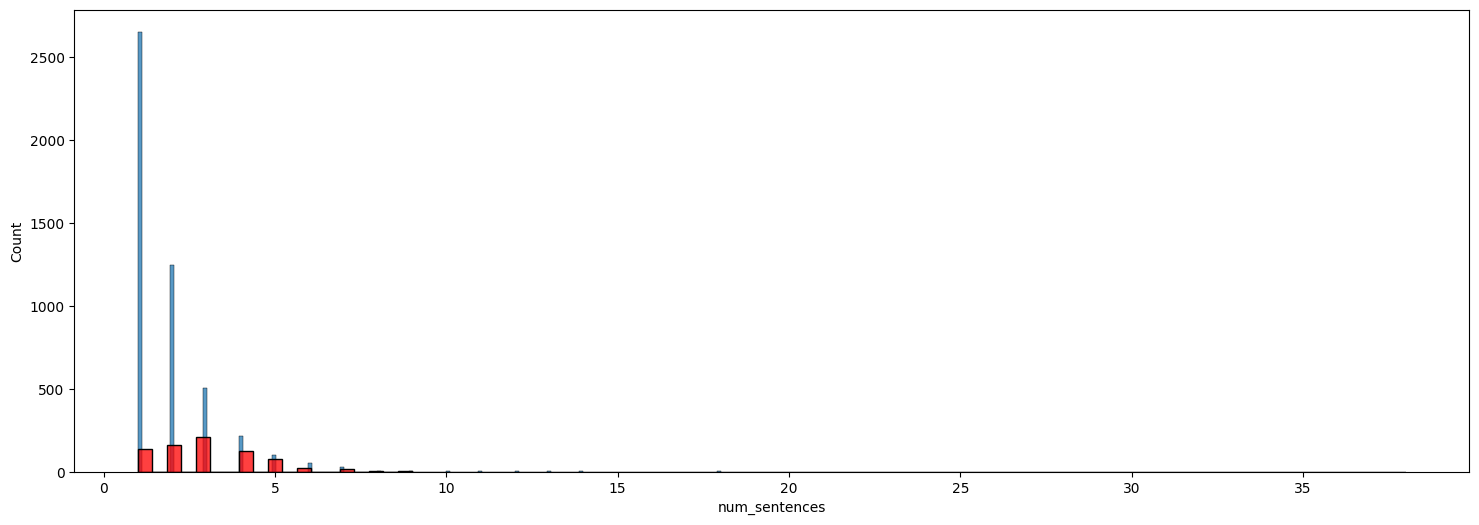

In [33]:
plot.figure(figsize=(18,6))
sns.histplot(mail_data[mail_data['Category']==1]['num_sentences'])
sns.histplot(mail_data[mail_data['Category']==0]['num_sentences'],color='red')

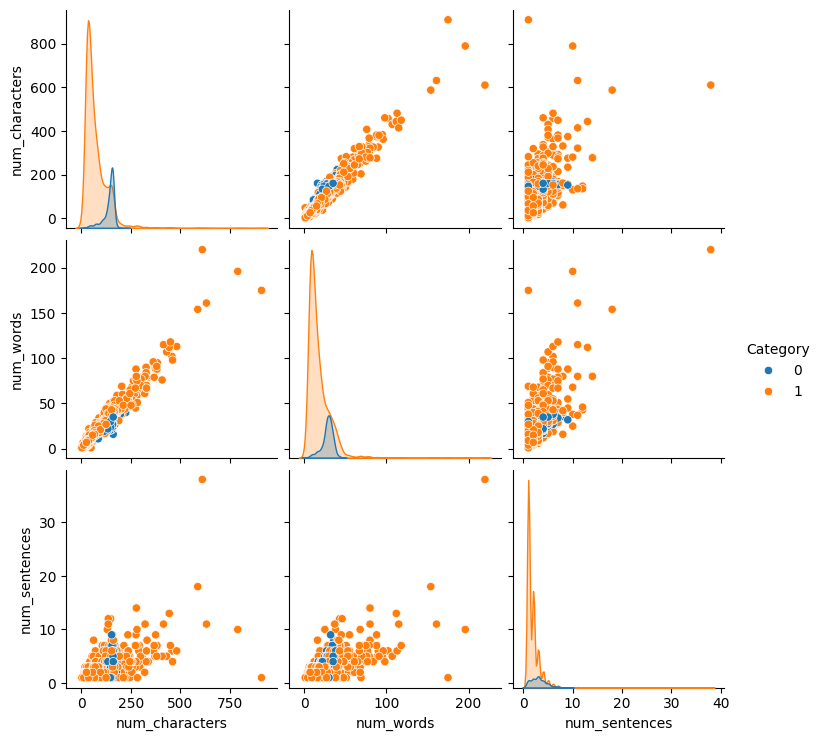

In [34]:
sns.pairplot(mail_data, hue ='Category')

In [35]:
#separating the data as texts and labels
X=mail_data['Message']
Y=mail_data['Category']

In [36]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [37]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [38]:
#splitting the data into training and test data
X_train,  X_test , Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=3)

In [39]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [40]:
#transform the text data to feature vectors that can be used as input to logistic regression
feature_extraction= TfidfVectorizer(min_df=1,stop_words='english', lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features= feature_extraction.transform(X_test)

In [41]:
#convert Y_train and Y_test values as integers
Y_train= Y_train.astype('int')
Y_test= Y_test.astype('int')

In [42]:
Y_train

3075    1
1787    1
1614    1
4304    1
3266    1
       ..
789     1
968     1
1667    1
3321    1
1688    1
Name: Category, Length: 4457, dtype: int64

In [43]:
Y_test

2632    1
454     0
983     1
1282    1
4610    1
       ..
4827    1
5291    1
3325    1
3561    1
1136    0
Name: Category, Length: 1115, dtype: int64

In [44]:
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object


In [45]:
print(X_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

In [46]:
model=LogisticRegression()

In [47]:
#training the Logistic Regression model with the training data
model.fit(X_train_features,Y_train)

LogisticRegression()

In [48]:
#prediction on train data
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data= accuracy_score(Y_train,prediction_on_training_data)

In [49]:
print('Accuracy on training data:' ,accuracy_on_training_data)

Accuracy on training data: 0.9661207089970832


In [50]:
#prediction on test data
prediction_on_test_data=model.predict(X_test_features)
accuracy_on_test_data= accuracy_score(Y_test,prediction_on_test_data)

In [51]:
print('Accuracy on test data:', accuracy_on_test_data)

Accuracy on test data: 0.9623318385650225


In [52]:
input_mail=[" I've been searching for the right words to thank you for this breather. I promise I won't take your help for granted and will fulfill my promise.You have been a great support to me"]

#convert text to feature vectors
input_data_features= feature_extraction.transform(input_mail)

#making prediction
prediction=model.predict(input_data_features)
print(prediction)

if(prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

[1]
Ham mail
